## ***Basic Pytorch***

In [ ]:
import torch

In [ ]:
w = torch.tensor([[1.,2.]],requires_grad=True)
x = torch.tensor([[5.],[6.]])
b = torch.tensor(7.,requires_grad=True)

In [ ]:
wx = torch.matmul(w,x)
y = wx+b
print("Result:")
print(y)

Result:
tensor([[24.]], grad_fn=<AddBackward0>)


In [ ]:
y.backward()

In [ ]:
print("dy/dw",w.grad)
print("dy/db",b.grad)
print("dy/dx",x.grad)

dy/dw tensor([[5., 6.]])
dy/db tensor(1.)
dy/dx None


## ***Linear Regression***

### ***CUSTOM***

#### ***Dataset***
Data Set is generated with 3 Colummns of

*   Temperature
*   Rainfall
*   Humidity
*   Soil Fertility

The last Column is the Yeild of Apple(Target).



In [ ]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Generate dummy data
num_samples = 20

# Generate random values for features
temperature = np.random.uniform(10, 30, num_samples)
rainfall = np.random.uniform(50, 200, num_samples)
humidity = np.random.uniform(30, 80, num_samples)
soil_fertility = np.random.uniform(0.5, 1.5, num_samples)

# Generate random values for output (yield of apple)
yield_of_apple = 10 * temperature + 5 * rainfall - 3 * humidity + 2 * soil_fertility + np.random.normal(0, 10, num_samples)

# Stack features and output into a single numpy array
dummy_dataset = np.column_stack((temperature, rainfall, humidity, soil_fertility, yield_of_apple)).astype(int)

# Print the dummy dataset
print(dummy_dataset)


[[ 17 141  36   0 780]
 [ 29  70  54   0 491]
 [ 24  93  31   1 618]
 [ 21 104  75   0 517]
 [ 13 118  42   0 584]
 [ 13 167  63   1 770]
 [ 11  79  45   0 384]
 [ 27 127  56   1 757]
 [ 22 138  57   0 742]
 [ 24  56  39   1 421]
 [ 10 141  78   1 580]
 [ 29  75  68   0 460]
 [ 26  59  76   0 338]
 [ 14 192  74   1 897]
 [ 13 194  59   1 932]
 [ 13 171  76   1 782]
 [ 16  95  34   1 512]
 [ 20  64  39   0 418]
 [ 18 152  32   0 855]
 [ 15 116  46   0 597]]


In [ ]:
x_numpy = dummy_dataset[:, :4]
y_numpy = dummy_dataset[:,-1]
print(f"x :\n{x_numpy} \n and y :\n{y_numpy}")

x :
[[ 17 141  36   0]
 [ 29  70  54   0]
 [ 24  93  31   1]
 [ 21 104  75   0]
 [ 13 118  42   0]
 [ 13 167  63   1]
 [ 11  79  45   0]
 [ 27 127  56   1]
 [ 22 138  57   0]
 [ 24  56  39   1]
 [ 10 141  78   1]
 [ 29  75  68   0]
 [ 26  59  76   0]
 [ 14 192  74   1]
 [ 13 194  59   1]
 [ 13 171  76   1]
 [ 16  95  34   1]
 [ 20  64  39   0]
 [ 18 152  32   0]
 [ 15 116  46   0]] 
 and y :
[780 491 618 517 584 770 384 757 742 421 580 460 338 897 932 782 512 418
 855 597]


#### ***Model and Loss Details***

In [ ]:
import torch
x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

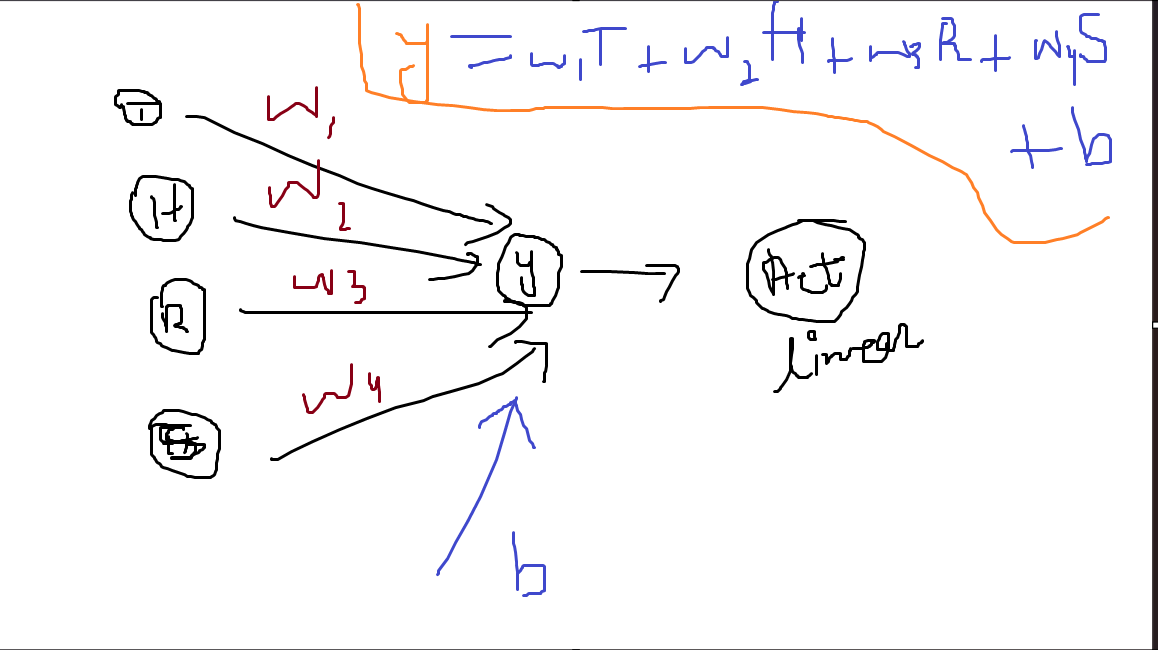

In [ ]:
w = torch.randn(1,4,requires_grad=True)
b = torch.rand(1,1,requires_grad = True)

In [ ]:
def model(x,w,b):
  return x @ w.t() + b

In [ ]:
def mse_funciton(y_pred, y_target):
  return torch.mean((y_pred - y_target)**2)

#### ***Cycle***

In [ ]:
epochs = 10000
for i in range(epochs):
    y_pred = model(x, w, b)
    loss = mse_funciton(y_pred, y)

    # Backpropagation
    loss.backward()

    # Update parameters using gradient descent
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5

        # Reset gradients to zero
        w.grad.zero_()
        b.grad.zero_()


In [ ]:
print(f"y_Target :\n{y}\ny_Pred :\n{y_pred}\n Loss : {loss}")

y_Target :
tensor([780., 491., 618., 517., 584., 770., 384., 757., 742., 421., 580., 460.,
        338., 897., 932., 782., 512., 418., 855., 597.])
y_Pred :
tensor([[600.2040],
        [672.3354],
        [606.7770],
        [647.6995],
        [501.8893],
        [631.5777],
        [398.2826],
        [758.2416],
        [703.2867],
        [545.6031],
        [556.3786],
        [703.3843],
        [637.4104],
        [713.1539],
        [678.9944],
        [659.1359],
        [491.5903],
        [498.6575],
        [631.4010],
        [534.8915]], grad_fn=<AddBackward0>)
 Loss : 39207.140625


### ***Pytorch Based***

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Create DataLoader
dataset = TensorDataset(x, y)
dataloader = DataLoader(dataset, batch_size=5, shuffle=True)

In [ ]:
model = nn.Linear(4,1)
model.parameters()

<generator object Module.parameters at 0x7afef2480660>

In [ ]:
# Define loss function
criterion = nn.MSELoss()

# Define optimizer
optimizer = optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
epochs = 10000
losses = []  # To store the loss values
epochs = 10000
losses = []  # To store the loss values
for epoch in range(epochs):
    for inputs, targets in dataloader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)

        # Backward pass
        loss.backward()

        # Update parameters
        optimizer.step()

    # Store the loss value for plotting


    # Print loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
        losses.append(loss.item())


Epoch [1000/10000], Loss: 244.4334
Epoch [2000/10000], Loss: 261.8239
Epoch [3000/10000], Loss: 98.5480
Epoch [4000/10000], Loss: 76.5256
Epoch [5000/10000], Loss: 182.4056
Epoch [6000/10000], Loss: 157.0927
Epoch [7000/10000], Loss: 153.1862
Epoch [8000/10000], Loss: 149.6711
Epoch [9000/10000], Loss: 222.4096
Epoch [10000/10000], Loss: 65.4875


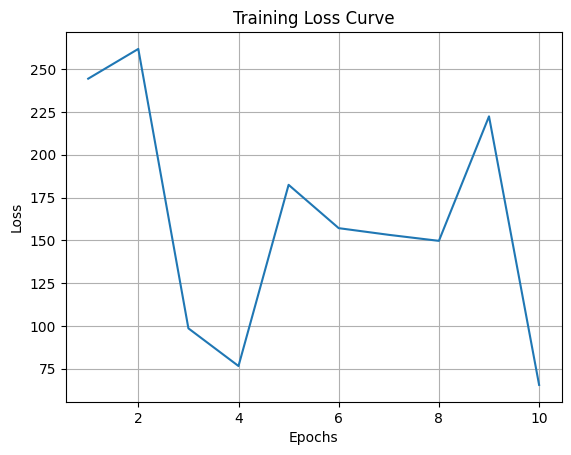

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10+1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)
plt.show()

## ***Logistic Regression with Images***

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
from torchvision.datasets import MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 71103381.17it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 47578827.11it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 23186447.97it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7430003.42it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
from torch.utils.data import random_split
train_dataset, val_dataset= random_split(train_dataset, [50000, 10000])
print(f"{len(val_dataset)},{len(train_dataset)}")

10000,50000


In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [ ]:
import torch.nn as nn
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input tensor
        x = self.linear(x)
        return x

In [ ]:
import torch.optim as optim
model = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Validation loop
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')

Epoch [1/5], Step [100/391], Loss: 0.8107
Epoch [1/5], Step [200/391], Loss: 0.6426
Epoch [1/5], Step [300/391], Loss: 0.5810
Validation Accuracy: 86.87%
Epoch [2/5], Step [100/391], Loss: 0.5584
Epoch [2/5], Step [200/391], Loss: 0.4640
Epoch [2/5], Step [300/391], Loss: 0.4710
Validation Accuracy: 88.62%
Epoch [3/5], Step [100/391], Loss: 0.4438
Epoch [3/5], Step [200/391], Loss: 0.4114
Epoch [3/5], Step [300/391], Loss: 0.3625
Validation Accuracy: 89.26%
Epoch [4/5], Step [100/391], Loss: 0.4128
Epoch [4/5], Step [200/391], Loss: 0.3632
Epoch [4/5], Step [300/391], Loss: 0.3003
Validation Accuracy: 89.69%
Epoch [5/5], Step [100/391], Loss: 0.3906
Epoch [5/5], Step [200/391], Loss: 0.3773
Epoch [5/5], Step [300/391], Loss: 0.3542
Validation Accuracy: 90.04%


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 90.66%


## ***Neural Networks***

In [3]:
import torch
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn as nn

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [5]:
train_dataset = MNIST(root= "/data", train = True, transform=transform, download=True)
test_dataset = MNIST(root= "/data", train=False, transform=transform, download=True)
train_size = int(0.85 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size = 64 , shuffle = True )
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [6]:
class neuralNetwork(nn.Module):
  def __init__(self):
    super(neuralNetwork, self).__init__()
    self.flatten = nn.Flatten
    self.linear_relu_stack = nn.Sequential (
        nn.Linear(28*28,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256,10),
    )
  def forward(self,x):
    x = x.view(x.size(0), -1)
    output = self.linear_relu_stack(x)
    return output

In [7]:
model = neuralNetwork()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_function = nn.CrossEntropyLoss()

In [8]:
epochs = 5
for epoch in range(epochs):
  model.train()
  for i,(image,label) in enumerate(train_loader):
    optimizer.zero_grad()
    pred = model(image)
    loss= loss_function(pred,label)
    loss.backward()
    optimizer.step()
    if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Validation loop
  model.eval()  # Set model to evaluation mode
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in val_loader:
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Validation Accuracy: {accuracy:.2f}%')

Epoch [1/5], Step [100/797], Loss: 2.2254
Epoch [1/5], Step [200/797], Loss: 2.1406
Epoch [1/5], Step [300/797], Loss: 1.8579
Epoch [1/5], Step [400/797], Loss: 1.3545
Epoch [1/5], Step [500/797], Loss: 1.0116
Epoch [1/5], Step [600/797], Loss: 0.6998
Epoch [1/5], Step [700/797], Loss: 0.6349
Validation Accuracy: 83.93%
Epoch [2/5], Step [100/797], Loss: 0.4839
Epoch [2/5], Step [200/797], Loss: 0.3971
Epoch [2/5], Step [300/797], Loss: 0.4046
Epoch [2/5], Step [400/797], Loss: 0.4131
Epoch [2/5], Step [500/797], Loss: 0.3647
Epoch [2/5], Step [600/797], Loss: 0.2835
Epoch [2/5], Step [700/797], Loss: 0.3556
Validation Accuracy: 89.30%
Epoch [3/5], Step [100/797], Loss: 0.4339
Epoch [3/5], Step [200/797], Loss: 0.3221
Epoch [3/5], Step [300/797], Loss: 0.3553
Epoch [3/5], Step [400/797], Loss: 0.3394
Epoch [3/5], Step [500/797], Loss: 0.4139
Epoch [3/5], Step [600/797], Loss: 0.4976
Epoch [3/5], Step [700/797], Loss: 0.2178
Validation Accuracy: 90.29%
Epoch [4/5], Step [100/797], Loss:

In [9]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 92.96%


## ***Convolutional Neural Networks***